In [1]:
import torch
from torch import optim
from torch import Tensor
from torch import nn

from torch.nn import functional as F
import torchvision.transforms as T 
import matplotlib.pyplot as plt
from PIL import Image

transform = T.ToPILImage()

In [2]:
DATA_PATH = './'

In [3]:
path_train = DATA_PATH + 'train_data.pkl'
path_val = DATA_PATH + 'val_data.pkl'

# 2 tensors of size 50000 x 3 x H x W
noisy_imgs_1, noisy_imgs_2 = torch.load(path_train)
#noisy_imgs_1_poisson = noisy_imgs_1 + torch.poisson(torch.rand(noisy_imgs_1.size()) * 5) 
#noisy_imgs_2_poisson = noisy_imgs_2 + torch.poisson(torch.rand(noisy_imgs_2.size()) * 5) 
#noisy_imgs_1_bernoulli = noisy_imgs_1 + torch.bernoulli(torch.empty(noisy_imgs_1.size()).uniform_(0, 1))*5
#noisy_imgs_2_bernoulli = noisy_imgs_2 + torch.bernoulli(torch.empty(noisy_imgs_2.size()).uniform_(0, 1))*5

noisy_imgs_1 , noisy_imgs_2 = noisy_imgs_1, noisy_imgs_2
#noisy_imgs_1_poisson , noisy_imgs_2_poisson = noisy_imgs_1_poisson.float()/255, noisy_imgs_2_poisson.float()/255
#noisy_imgs_1_bernoulli , noisy_imgs_2_bernoulli = noisy_imgs_1_bernoulli.float()/255, noisy_imgs_2_bernoulli.float()/255

noisy_imgs, clean_imgs = torch.load(path_val)
noisy_imgs , clean_imgs = noisy_imgs.float(), clean_imgs.float()/255

print(noisy_imgs_1.size())
print(noisy_imgs_2.size())
#print(noisy_imgs_1_poisson.size())
#print(noisy_imgs_2_poisson.size())
#print(noisy_imgs_1_bernoulli.size())
#print(noisy_imgs_2_bernoulli.size())
print(noisy_imgs.size())
print(clean_imgs.size())

torch.Size([50000, 3, 32, 32])
torch.Size([50000, 3, 32, 32])
torch.Size([1000, 3, 32, 32])
torch.Size([1000, 3, 32, 32])


In [4]:
#blurrer_1 = T.GaussianBlur(kernel_size=(5, 5), sigma=(0.5, 0.5))
#blurred_1_noisy_imgs_1 = blurrer_1(noisy_imgs_1)
#blurred_1_noisy_imgs_2 = blurrer_1(noisy_imgs_2)

In [5]:
#train_input = torch.cat((noisy_imgs_1,noisy_imgs_1_poisson,noisy_imgs_1_bernoulli),dim =0)
#train_target = torch.cat((noisy_imgs_2,noisy_imgs_2_poisson,noisy_imgs_2_bernoulli),dim =0)

In [6]:
train_input = noisy_imgs_1
train_target = noisy_imgs_2

In [7]:
from Miniproject_2.model import Model

net = Model()

In [9]:
net.train(train_input, train_target, 50)

current 0 Loss: 529511.8847
tensor(5.9882)
current 1 Loss: 529511.8847
tensor(5.9882)


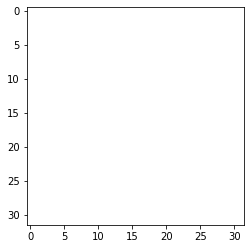

In [ ]:
plt.imshow(net.predict(noisy_imgs[0:2])[1].numpy().transpose(1,2,0));

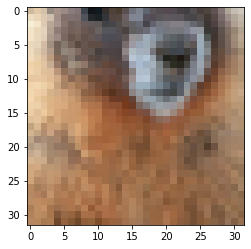

In [ ]:
plt.imshow(clean_imgs[1].permute(1,2,0).numpy());